In [233]:
from sentence_transformers import SentenceTransformer, util
import numpy as np
import csv
import time
from os.path import isfile
import pandas as pd
import re
import spacy

model = SentenceTransformer('all-mpnet-base-v2')

In [234]:
import matplotlib.pyplot as plt
embeddings_path = "./archive/encodings.npy"

# Create sentance embeddings
def create_embeddings(model : SentenceTransformer, text : list[str]):
    # Create and save the encodings to the specified file
    return np.array(model.encode(text, normalize_embeddings=True))


def plot(tensor):
  x = np.arange(len(tensor))
  y = tensor
  plt.plot(x,y)
  plt.xlabel('Sample Number')
  plt.ylabel('Similarity')
  plt.title('Similarity scores')
  plt.show()

def find_similarity(model, embeddings, text):
  question_embedding = model.encode(text)
  print(len(question_embedding))
  print(len(embeddings))
  return util.dot_score(embeddings, question_embedding)

def generate_all_text_emeddings(model, text: list[str]):
   return [model.encode(val) for val in text]


nlp = spacy.load('en_core_web_sm')
def split_sentances(text: str):
  #text = text.replace('\n', '').replace('?', '').replace('.', '')

  # Split the string into sentences using regular expression
  return [sent.text for sent in nlp(text).sents]



In [235]:
def prepare_dataframe(df: pd.DataFrame):
    df["Split_Text"] = df["ABSTRACT"].apply(lambda x: split_sentances(x))


df_test = pd.read_csv("./archive/test_tm/test.csv")
df_train = pd.read_csv("./archive/train_tm/train.csv")


vals = np.array([])
prepare_dataframe(df_train)
prepare_dataframe(df_test)

df_train.head()
#df_test.head()

In [ ]:
df_train.to_csv("./archive/train_tm/train_processed.csv")
df_test.to_csv("./archive/test_tm/test_processed.csv")

text = df_train["Split_Text"][800]
encoding = create_embeddings(model, text)[0]
len(encoding)
# print(encoding)
for val in text:
    print(val)

  We prove a general width duality theorem for combinatorial structures with
well-defined notions of cohesion and separation.
These might be graphs and
matroids, but can be much more general or quite different.
The theorem asserts
a duality between the existence of high cohesiveness somewhere local and a
global overall tree structure.
We describe cohesive substructures in a unified way in the format of tangles:
as orientations of low-order separations satisfying certain consistency axioms.
These axioms can be expressed without reference to the underlying structure,
such as a graph or matroid, but just in terms of the poset of the separations
themselves.
This makes it possible to identify tangles, and apply our
tangle-tree duality theorem, in very diverse settings.
Our result implies all the classical duality theorems for width parameters in
graph minor theory, such as path-width, tree-width, branch-width or rank-width.
It yields new, tangle-type, duality theorems for tree-width and pat

In [ ]:
results = [None] * len(text)
all_embeddings = generate_all_text_emeddings(model, text)
# for i in range(len(results)):
#     results[i] = find_similarity(model, encoding, text[i])
print(f"({len(all_embeddings)}, {len(all_embeddings[0])})")


(11, 768)


In [ ]:
results = np.ones((len(all_embeddings), len(all_embeddings)))
print(results.shape)
for i in range(len(all_embeddings)):
    for j in range(len(all_embeddings)):
        if i != j:
            results[i,j] = util.dot_score(all_embeddings[i], all_embeddings[j])


(11, 11)


In [ ]:
print(results)

[[ 1.          0.26287282  0.57300395  0.531717    0.68745065  0.36638045
   0.18204011  0.09634304  0.14073095  0.15693076  0.40186793]
 [ 0.26287282  1.          0.34923431  0.3201589   0.47004366  0.26993912
   0.33663845  0.27491981  0.13662982  0.31273109  0.05509862]
 [ 0.57300395  0.34923431  1.          0.59120113  0.67672217  0.5396015
   0.42571443  0.08893351  0.26617315  0.18194383  0.34724846]
 [ 0.531717    0.3201589   0.59120113  1.          0.67429721  0.41081023
   0.38459399  0.12889862  0.22811653  0.189953    0.12753406]
 [ 0.68745065  0.47004366  0.67672217  0.67429721  1.          0.54441524
   0.42647427  0.2345984   0.23885992  0.30857658  0.34078765]
 [ 0.36638045  0.26993912  0.5396015   0.41081023  0.54441524  1.
   0.50163829  0.28378063  0.33259147  0.39035279  0.39589399]
 [ 0.18204011  0.33663845  0.42571443  0.38459399  0.42647427  0.50163829
   1.          0.53251266  0.48538306  0.43514344  0.02380499]
 [ 0.09634304  0.27491981  0.08893351  0.12889862 

In [ ]:
# Initialize avg array
avg = [[None] * 2 for _ in range(len(results)) ]
# calculate all average values found in the results
for i in range(len(results)):
    temp = results[i]
    np.delete(temp, i)
    avg[i][0] = np.sum(temp) / len(temp)
    avg[i][1] = i

avg.sort(key=lambda x: x[0])

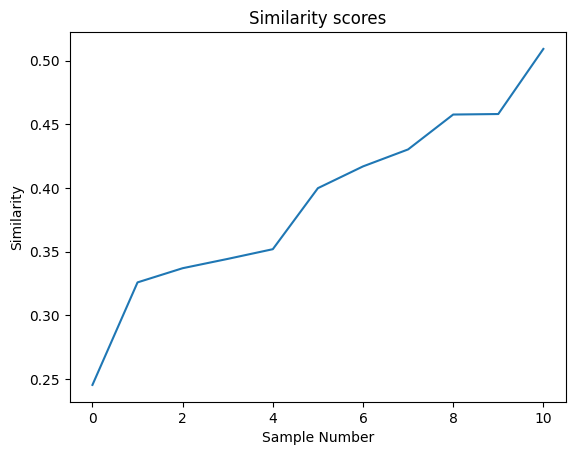

Val: 0.0805269171991809
Val: 0.011130942201072525
Val: 0.007313490252603194
Val: 0.0076242146420885115
Val: 0.04792769900946453
Val: 0.017085729674859496
Val: 0.013333003290674883
Val: 0.027405456047166488
Val: 0.0003975209864703344
Val: 0.05113175375895063
[[2, 3], [3, 4], [8, 9]]


In [ ]:
sim_vals = [[avg[i][0] for i in range(len(avg))]][0]
sim_ids =  [[avg[i][1] for i in range(len(avg))]][0]
plot([avg[i][0] for i in range(len(avg))])

threshold = 0.01
val1 = sim_vals[0]

indices = []
for i in range(1, len(sim_vals)):
    val2 = sim_vals[i]
    val = val2 - val1
    print(f"Val: {val}")
    if val <= threshold:
        indices.append([i-1, i])
    val1 = val2

print(indices)

In [ ]:
pairs = [[None] * 2 for _ in range(len(indices))]
for i in range(len(indices)):
    pairs[i][0] = sim_ids[indices[i][0]]
    pairs[i][1] = sim_ids[indices[i][1]]
print(pairs)
print(f"Text 1: {text[pairs[2][1]]}")
print(f"Text 2: {text[pairs[2][0]]}")
print(f"Text: {text[2]}")

[[7, 1], [1, 9], [5, 2]]
Text 1: The theorem asserts
a duality between the existence of high cohesiveness somewhere local and a
global overall tree structure.
We describe cohesive substructures in a unified way in the format of tangles:
as orientations of low-order separations satisfying certain consistency axioms.
These axioms can be expressed without reference to the underlying structure,
such as a graph or matroid, but just in terms of the poset of the separations
themselves.
Text 2: For example, our theorem can be applied to image analysis
by capturing the regions of an image as tangles of separations defined as
natural partitions of its set of pixels.
Text: The theorem asserts
a duality between the existence of high cohesiveness somewhere local and a
global overall tree structure.
We describe cohesive substructures in a unified way in the format of tangles:
as orientations of low-order separations satisfying certain consistency axioms.
These axioms can be expressed without referen